In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("D:/Datasets/base_datos_2008.csv")
df.shape

(7009728, 29)

In [3]:
# eliminamos los datos daltantes de las columnas que vamos a graficar
df.dropna(inplace=True, subset=["ArrDelay","DepDelay","Distance","AirTime"])
df.shape

(6855029, 29)

In [4]:
# Ajustamos el tamaño del grafico para poder visualizarlo
sns.set(rc={"figure.figsize":(15,10)})

## Nube de puntos

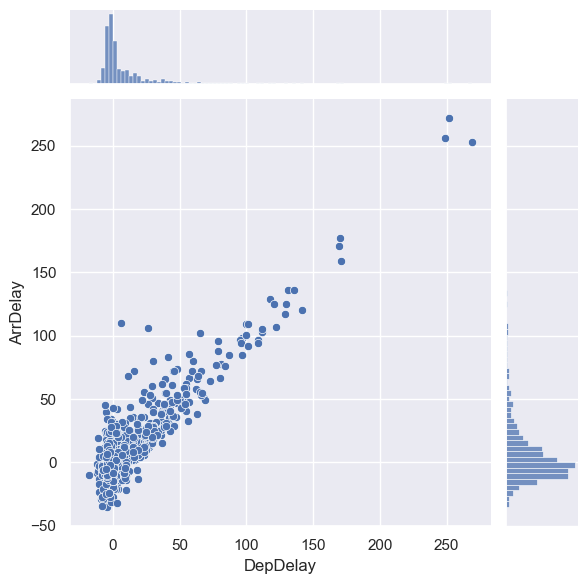

In [5]:
# Generamos un nuevo DF con vuelos de la lista y solamente para mil registros
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
# sns.jointplot(df2["DepDelay"],df2["ArrDelay"])
sns.jointplot(data=df2, x="DepDelay", y="ArrDelay")

In [6]:
# creamos un nuevo dataset con los valores de los retraso menores a 40
df3 = df2[np.abs(df2["DepDelay"])<40]
df3.shape

(912, 29)

In [7]:
df3 = df3[np.abs(df3["ArrDelay"])<40]
df3.shape

(886, 29)

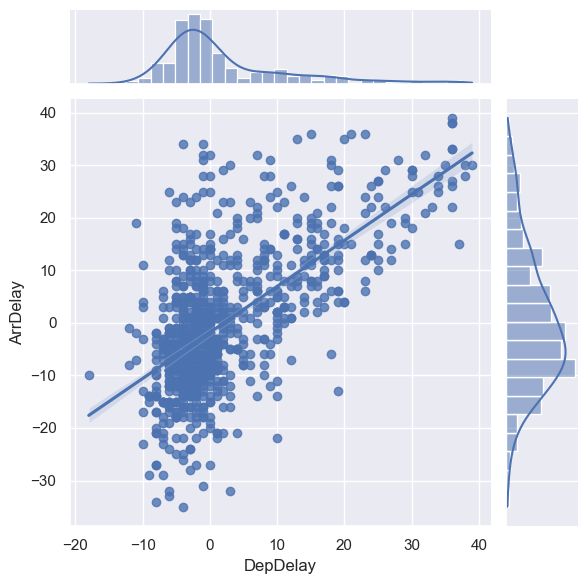

In [8]:
sns.jointplot(data=df3, x="DepDelay", y="ArrDelay", kind="reg")

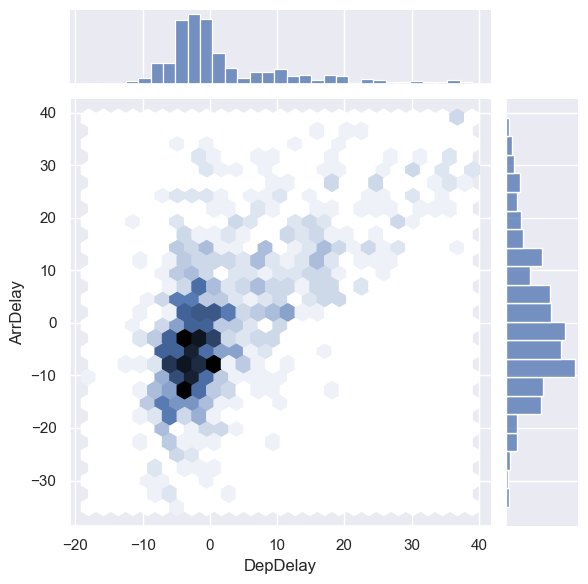

In [9]:
sns.jointplot(data=df3, x="DepDelay", y="ArrDelay", kind="hex")

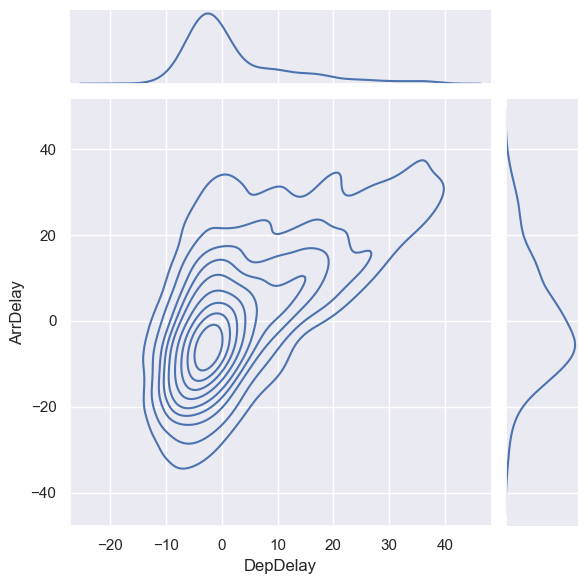

In [10]:
sns.jointplot(data=df3, x="DepDelay", y="ArrDelay", kind="kde")

In [11]:
gb_df = df2.groupby(by=["Origin","Month"], as_index=False)["DepDelay"].mean()

In [12]:
gb_df

,Origin,Month,DepDelay
0,ATL,1,13.189655
1,ATL,2,14.516667
2,ATL,3,14.855556
3,ATL,4,6.781250
4,ATL,5,7.257576
5,ATL,6,12.250000
6,ATL,7,17.378788
7,ATL,8,11.134831
8,ATL,9,3.500000
9,ATL,10,2.666667


In [13]:
data = gb_df.pivot(index="Month", columns="Origin" , values="DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,13.189655,21.000000,-2.142857
2,14.516667,4.750000,44.333333
3,14.855556,5.571429,6.600000
4,6.781250,16.750000,-4.500000
5,7.257576,6.000000,-4.714286
6,12.250000,7.222222,3.818182
7,17.378788,6.142857,1.833333
8,11.134831,5.500000,-4.000000
9,3.500000,7.545455,6.000000


<Axes: xlabel='Origin', ylabel='Month'>

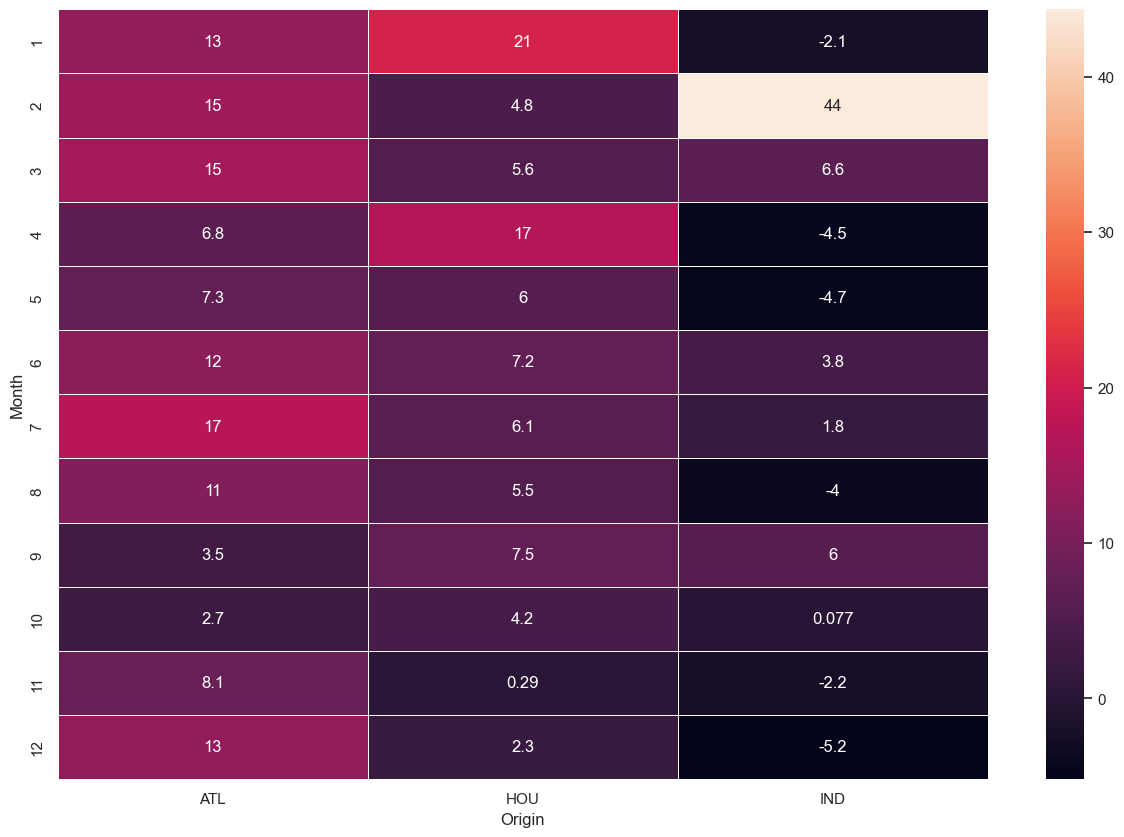

In [14]:
sns.heatmap(data=data, annot=True, linewidths=0.5)